In [1]:
import numpy as np
import pandas as pd
import mrcfile
import cv2
import glob
from matplotlib import pyplot as plt, patches

import math
%matplotlib inline
from moviepy.Clip import *


In [2]:
#for_lab_pc
micrograph_path = '/media/ashwin/data2/ViTPicker_data/detr_train_val_data_no_coord_missing/val/FoilHole_3165078_Data_3165619_3165620_20190104_1822-61123.jpg'
particle_coordinate_path = '/media/ashwin/data2/ViTPicker_data/detr_train_val_data_no_coord_missing/particle_coordinates/FoilHole_3165078_Data_3165619_3165620_20190104_1822-61123.csv'


In [3]:
particle_coord = pd.read_csv(particle_coordinate_path)
particle_coord.head()

,X-Coordinate,Y-Coordinate,Diameter,Angle-Psi,Origin X (Ang),Origin Y (Ang),Defocus U,Defocus V,Defocus Angle,Phase Shift,CTF B Factor
0,776,3342,212,85.408157,-0.6955,2.0865,15245.007812,14942.974609,-57.376141,0.0,0.0
1,2902,999,212,109.285706,-0.6955,3.4775,15868.644531,15566.611328,-57.376141,0.0,0.0
2,2519,768,212,67.040810,2.0865,-0.6955,15855.378906,15553.345703,-57.376141,0.0,0.0
3,232,3198,212,338.877533,0.6955,2.0865,15128.664062,14826.630859,-57.376141,0.0,0.0
4,536,2087,212,28.469387,0.6955,0.6955,15484.596680,15182.563477,-57.376141,0.0,0.0


In [4]:
particle_coord['anchor_x'] = particle_coord['X-Coordinate'] - particle_coord['Diameter'] / 2
particle_coord['anchor_y'] = particle_coord['Y-Coordinate'] - particle_coord['Diameter'] / 2

particle_coord['width_height'] = particle_coord['Diameter']

box_coord = particle_coord[['anchor_x', 'anchor_y', 'width_height']]
box_coord.head()


,anchor_x,anchor_y,width_height
0,670.0,3236.0,212
1,2796.0,893.0,212
2,2413.0,662.0,212
3,126.0,3092.0,212
4,430.0,1981.0,212


In [5]:
box_coord_list = box_coord.values.tolist()
box_coord_list

[[670.0, 3236.0, 212.0],
 [2796.0, 893.0, 212.0],
 [2413.0, 662.0, 212.0],
 [126.0, 3092.0, 212.0],
 [430.0, 1981.0, 212.0],
 [1029.0, 150.0, 212.0],
 [1757.0, 526.0, 212.0],
 [1413.0, 3180.0, 212.0],
 [1541.0, 2045.0, 212.0],
 [214.0, 134.0, 212.0],
 [1645.0, 2948.0, 212.0],
 [1477.0, 590.0, 212.0],
 [2117.0, 1477.0, 212.0],
 [957.0, 3252.0, 212.0],
 [1989.0, 2213.0, 212.0],
 [2237.0, 2077.0, 212.0],
 [814.0, 2876.0, 212.0],
 [1349.0, 2980.0, 212.0],
 [3180.0, 678.0, 212.0],
 [893.0, 2037.0, 212.0],
 [3156.0, 438.0, 212.0],
 [2309.0, 294.0, 212.0],
 [2613.0, 1397.0, 212.0],
 [861.0, 710.0, 212.0],
 [3292.0, 182.0, 212.0],
 [550.0, 973.0, 212.0],
 [1605.0, 2517.0, 212.0],
 [2852.0, 1477.0, 212.0],
 [2565.0, 1973.0, 212.0],
 [1885.0, 2405.0, 212.0],
 [694.0, 1981.0, 212.0],
 [3500.0, 877.0, 212.0],
 [542.0, 2485.0, 212.0],
 [1309.0, 845.0, 212.0],
 [2021.0, 1805.0, 212.0],
 [2637.0, 230.0, 212.0],
 [534.0, 2181.0, 212.0],
 [2653.0, 2341.0, 212.0],
 [2149.0, 2908.0, 212.0],
 [1805.0, 334

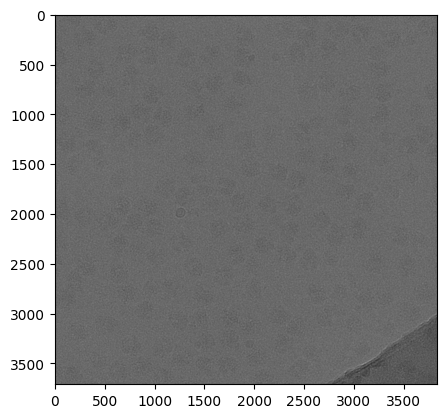

In [6]:
image = plt.imread(micrograph_path)
plt.imshow(image, cmap='gray')

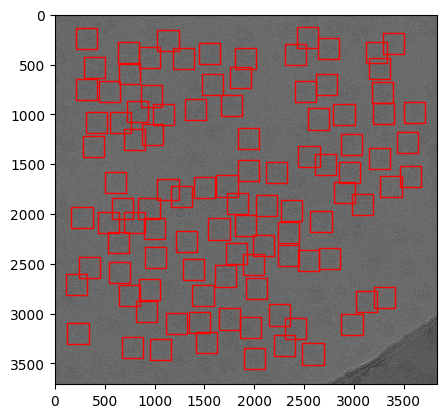

In [7]:
# def draw_bounding_box(resized_image, boxes):
# pahile image define garne, garisakyo

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
plt.imshow(image)

# Create a Rectangle patch
for i, box in enumerate(box_coord_list):
    x= (box_coord_list[i][0])
    y = box_coord_list[i][1]
    width = box_coord_list[i][2]
    height = box_coord_list[i][2]
    rect = patches.Rectangle((x,y), width, width, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
axes_img1 = plt.imshow(image, cmap='gray')
plt.imsave("/media/ashwin/data/Ashwin/Projects/cryoEM/particle_picker/ViTPicker/output/output_pretrained/500ephs_pretrained/18jam15a_0025_ali_DW_true.jpg", image, cmap='gray')

In [8]:
plt.imsave("few.jpg", axes_img1)

AttributeError: 'tuple' object has no attribute 'shape'